# Principal Component Analysis with Cancer Data

In [513]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [514]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [515]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [516]:
features_df = cancer_df.drop(['ID'], axis = 1)

In [517]:
features_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [518]:
features_df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [519]:
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [520]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [521]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [522]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [523]:
features_df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [524]:
filter1 = features_df['Bare Nuclei'] == '?'

In [525]:
features_df[filter1].shape

(16, 10)

In [526]:
features_df.loc[filter1, 'Bare Nuclei'] = np.nan

In [527]:
features_df.isnull().sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [528]:
features_df = features_df.apply(lambda x: x.fillna(x.median()),axis=1)

In [529]:
features_df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [530]:
features_df.shape

(699, 10)

In [531]:
features_df.duplicated(keep='first').sum()

236

In [532]:
features_df.drop_duplicates(keep = 'first', inplace = True)

In [533]:
features_df.shape

(463, 10)

In [534]:
features_df['Bare Nuclei'] = features_df['Bare Nuclei'].astype('float64')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [535]:
# Check for correlation of variable

In [536]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [537]:
#Let us check for pair plots

In [538]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [539]:
corr_matrix = features_df.corr()

In [540]:
corr_matrix

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.578156,0.588956,0.383573,0.432165,0.516705,0.496158,0.450853,0.296797,0.675748
Cell Size,0.578156,1.000000,0.877404,0.640096,0.689982,0.597223,0.712986,0.657170,0.403911,0.757623
Cell Shape,0.588956,0.877404,1.000000,0.612415,0.649388,0.623004,0.687331,0.654724,0.381645,0.757932
Marginal Adhesion,0.383573,0.640096,0.612415,1.000000,0.528163,0.595347,0.611294,0.514134,0.358434,0.622371
Single Epithelial Cell Size,0.432165,0.689982,0.649388,0.528163,1.000000,0.486311,0.554625,0.558757,0.434875,0.604709
Bare Nuclei,0.516705,0.597223,0.623004,0.595347,0.486311,1.000000,0.612035,0.484522,0.263648,0.760736
Normal Nucleoli,0.496158,0.712986,0.687331,0.611294,0.554625,0.612035,1.000000,0.607259,0.279795,0.707166
Bland Chromatin,0.450853,0.657170,0.654724,0.514134,0.558757,0.484522,0.607259,1.000000,0.369716,0.639909
Mitoses,0.296797,0.403911,0.381645,0.358434,0.434875,0.263648,0.279795,0.369716,1.000000,0.360433
Class,0.675748,0.757623,0.757932,0.622371,0.604709,0.760736,0.707166,0.639909,0.360433,1.000000


Observations
-------------------

1. Clump Thickness is moderatley positively correlated with Cell Size (0.578156)

2. Clump Thickness is moderately positively correlated with Cell Shape (0.588956)

3. Cell Size is highly positvely correlated with Cell Shape (0.877404)

5. Cell Size is moderately positively correlated with Marginal Adhesion(0.640096), Single Epithelial Cell Size(0.689982), Bare Nuclei(0.598223), Normal Nucleoli(0.712986), Bland Chromatin(0.657170)


7. Cell Shape is moderately positively correlated with Marginal Adhesion(0.683079), Single Epithelial Cell Size(0.719668), Bare Nuclei(0.715495), Normal Nucleoli(0.735948), Bland Chromatin(0.719446)

8. Cell Shape is adequately highly correlated with Class(0.818934)

9. Bare Nuclei is adequately correlated with Class (0.820678)

10. Normal Nucleoli is moderately highly correlated with Class (0.756618)

11. Bland Chromatin is moderately highly correlated with Class (0.715540)

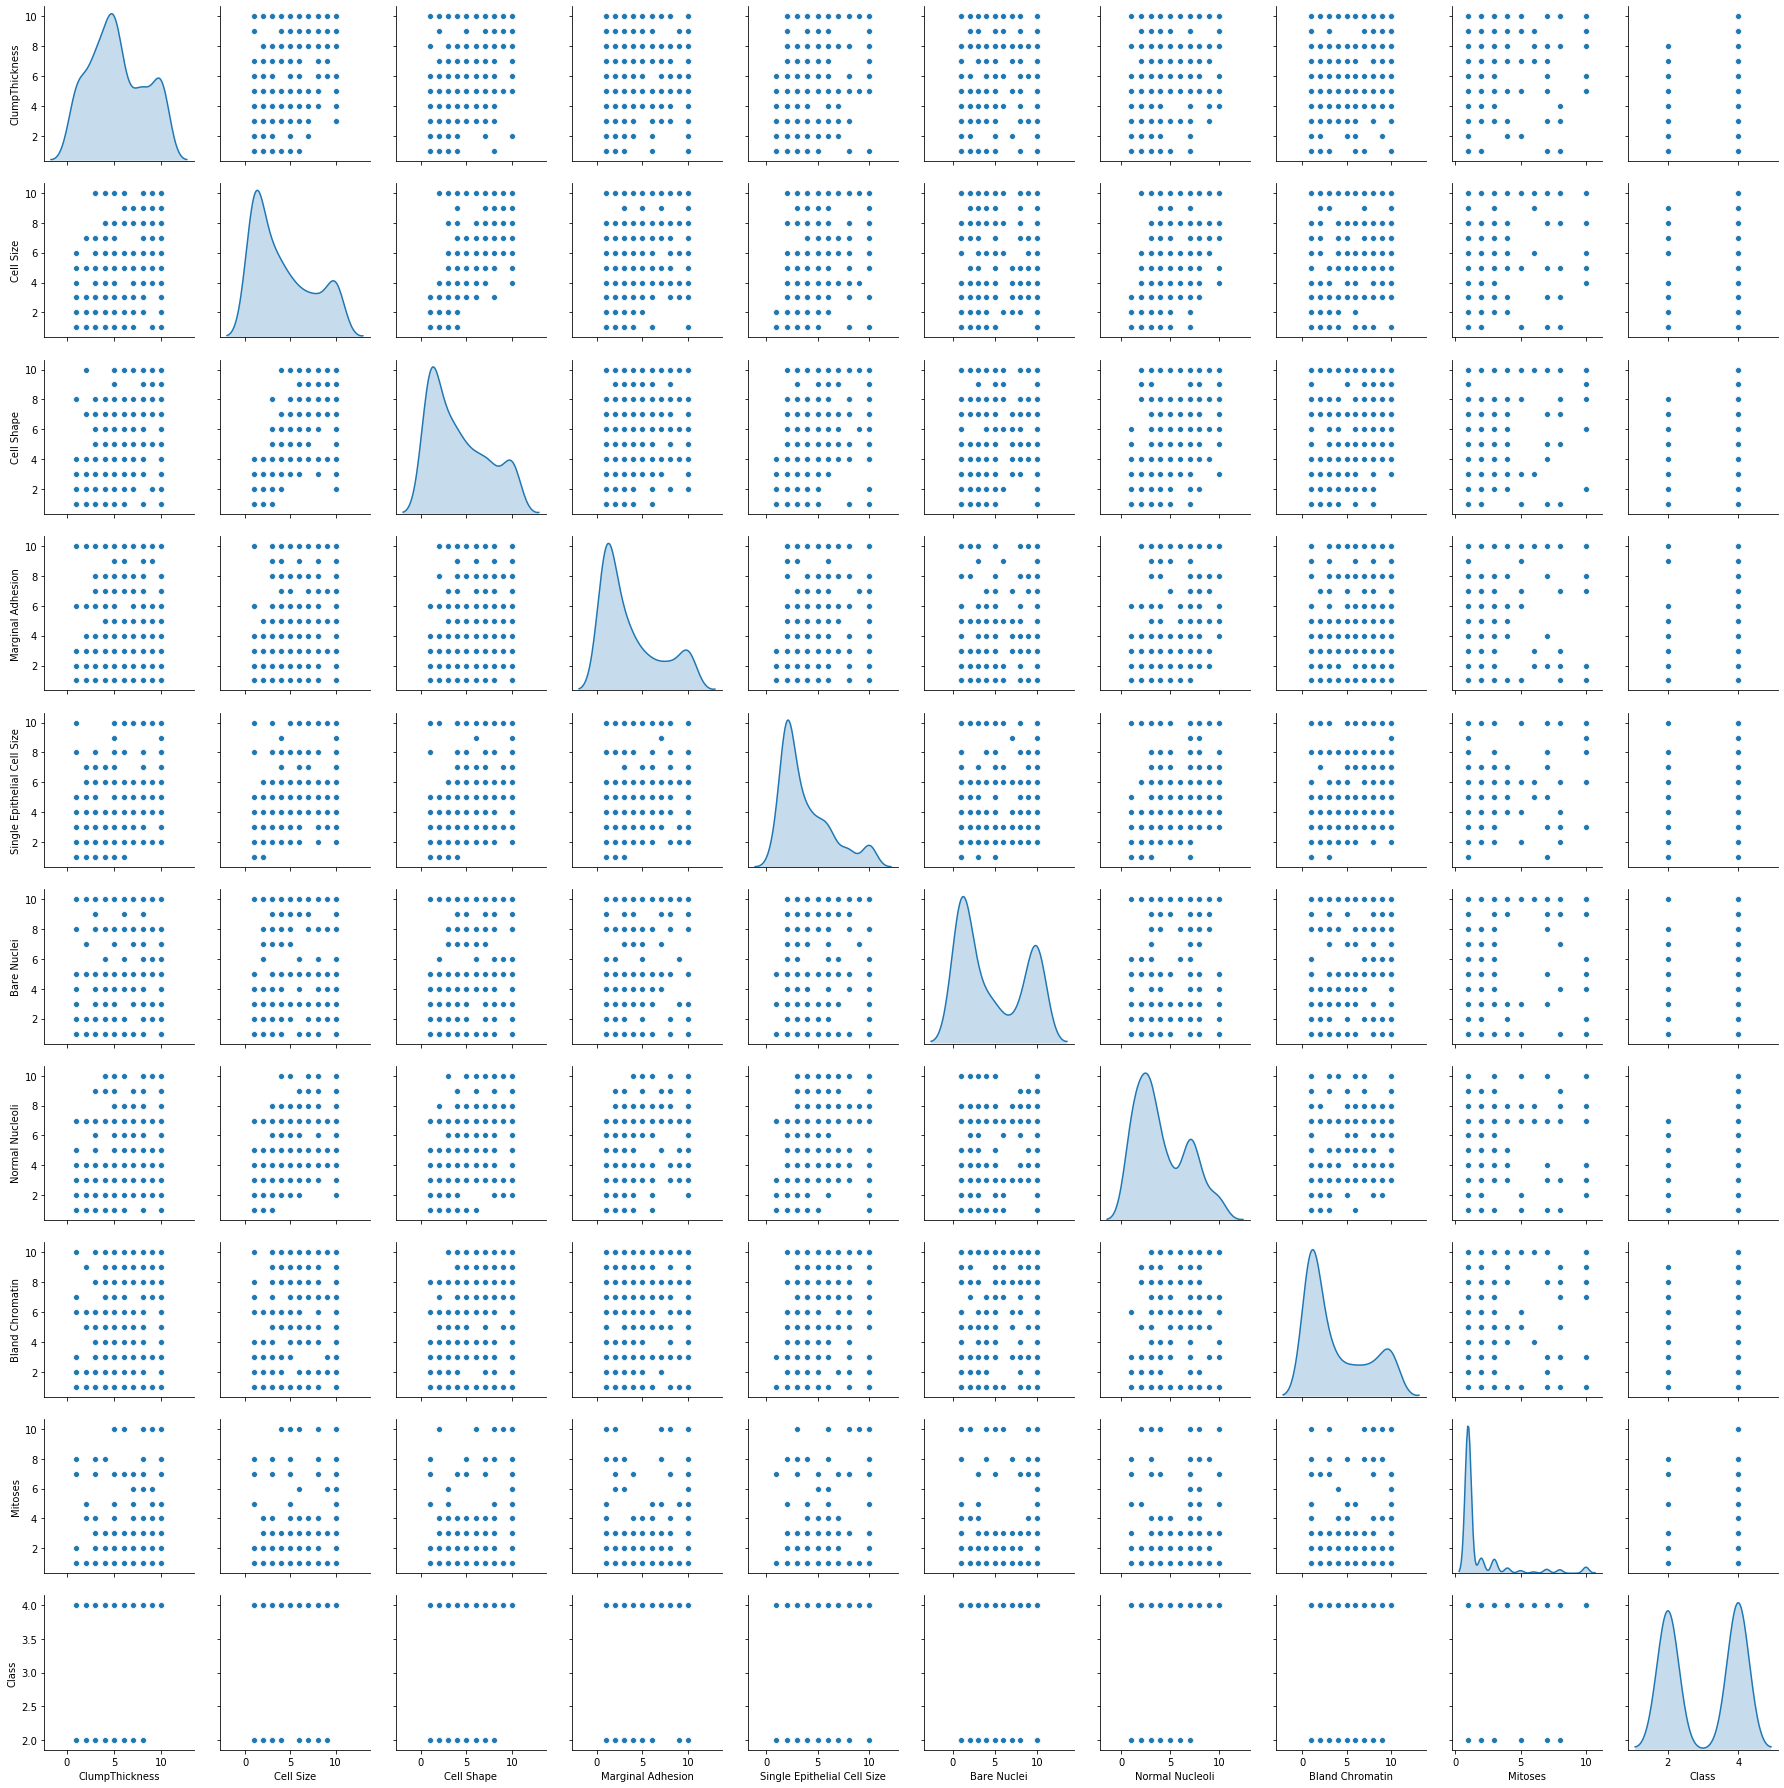

In [541]:
sns.pairplot(data = features_df, diag_kind = 'kde')
plt.show()

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [542]:
# We could see most of the outliers are now removed.

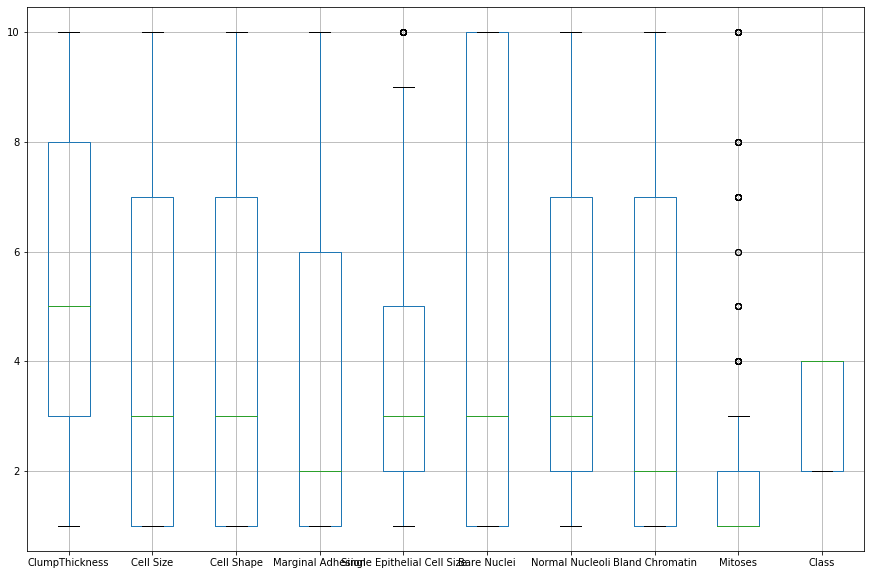

In [543]:
features_df.boxplot(figsize=(15, 10))
plt.show()

In [544]:
features_df.shape

(463, 10)

In [545]:
cols = ['Mitoses', 'Single Epithelial Cell Size']

for col in cols:
    Q1 = features_df[col].quantile(0.25)

    Q3 =  features_df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5 * IQR)

    upper_limit = Q3 + (1.5 * IQR)

    filter2 = features_df[col] > upper_limit

    features_df.drop(features_df[filter2].index, inplace = True)

In [546]:
features_df.shape

(393, 10)

# Q6 Create a covariance matrix for identifying Principal components

In [547]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = features_df.cov()

In [548]:
cov_matrix

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,7.674923,4.553247,4.465545,3.024777,1.966863,5.337858,3.392727,3.772356,0.492289,1.804539
Cell Size,4.553247,8.805785,7.413759,5.113115,3.489517,6.367392,5.223334,6.241821,0.524225,2.187945
Cell Shape,4.465545,7.413759,8.126045,4.829380,3.220777,6.528191,4.931830,5.935816,0.457334,2.149958
Marginal Adhesion,3.024777,5.113115,4.829380,8.032884,2.500032,6.352807,4.247287,4.446312,0.411279,1.719959
Single Epithelial Cell Size,1.966863,3.489517,3.220777,2.500032,3.229410,3.219180,2.521317,3.399634,0.306531,1.057005
Bare Nuclei,5.337858,6.367392,6.528191,6.352807,3.219180,13.888975,5.536753,5.425748,0.640773,2.864712
Normal Nucleoli,3.392727,5.223334,4.931830,4.247287,2.521317,5.536753,6.276068,4.922749,0.332139,1.765994
Bland Chromatin,3.772356,6.241821,5.935816,4.446312,3.399634,5.425748,4.922749,9.987849,0.553630,2.004985
Mitoses,0.492289,0.524225,0.457334,0.411279,0.306531,0.640773,0.332139,0.553630,0.319871,0.196993
Class,1.804539,2.187945,2.149958,1.719959,1.057005,2.864712,1.765994,2.004985,0.196993,0.986966


# Q7 Identify eigen values and eigen vector

In [549]:
# Step 2- Get eigen values and eigen vector

In [550]:
eig_vals, eig_vectors =np.linalg.eig(cov_matrix)

In [551]:
eig_vals

array([43.04062723,  7.07823458,  4.96705983,  3.77347778,  3.16330711,
        0.19906351,  0.267013  ,  2.26657388,  1.56256045,  1.01085917])

In [552]:
eig_vectors

array([[-2.85158606e-01, -9.87135851e-02,  8.32397201e-01,
        -8.99320238e-02, -4.45329597e-01, -6.37737110e-02,
        -5.01027542e-02,  2.22398749e-02, -5.06359131e-02,
        -3.59146805e-03],
       [-3.99893365e-01,  2.61970735e-01,  6.17200528e-02,
        -3.31629646e-01,  3.83750116e-01, -2.60443880e-02,
        -3.78534471e-02,  1.31745327e-01,  4.84737391e-02,
         6.98990103e-01],
       [-3.86216634e-01,  1.88082872e-01,  8.40181672e-02,
        -2.54851037e-01,  4.03695118e-01, -5.06269342e-02,
         2.83065456e-02,  1.78312733e-01,  2.54961077e-01,
        -6.93050333e-01],
       [-3.25650528e-01, -1.38425562e-01, -5.02593075e-01,
        -4.83787252e-01, -5.94570176e-01, -2.66562446e-03,
        -9.64927136e-03,  1.81722640e-01,  2.48620787e-02,
        -2.97496898e-02],
       [-1.93338592e-01,  1.33834031e-01, -6.00962931e-02,
         2.51893444e-02,  9.63364094e-02, -1.11756385e-02,
        -4.56030959e-02,  7.47046675e-02, -9.49544724e-01,
        -1.

# Q8 Find variance and cumulative variance by each eigen vector

In [553]:
eig_vectors.var()

0.09951937762767481

In [554]:
total_eigen_vals = sum(eig_vals)

var_explained = [(i/total_eigen_vals * 100) for i in sorted(eig_vals, reverse = True)]

print(var_explained)

print(np.cumsum(var_explained))

[63.92604980419202, 10.512941043921826, 7.377320792895226, 5.604554209284447, 4.698298814213461, 3.366426653673131, 2.32079139728324, 1.5013775963385572, 0.39658079590952444, 0.2956588922885669]
[ 63.9260498   74.43899085  81.81631164  87.42086585  92.11916466
  95.48559132  97.80638272  99.30776031  99.70434111 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [555]:
X = features_df.drop('Class', axis = 1)

y = features_df['Class']

In [556]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [557]:
X_pca = pca.transform(X)

In [558]:
X_pca.shape

(393, 9)

# Q10 Find correlation between components and features

In [559]:
pca.components_

array([[ 0.28707839,  0.40384401,  0.38989863,  0.32906283,  0.19525448,
         0.46379326,  0.31450588,  0.37554809,  0.03184199],
       [-0.09754812,  0.25938942,  0.18576906, -0.14361238,  0.13246926,
        -0.75464215,  0.08116878,  0.52387247, -0.00179459],
       [-0.83630639, -0.06412541, -0.08640266,  0.49762578,  0.0597781 ,
         0.09143669,  0.08793147,  0.14598851, -0.02010062],
       [ 0.08324011,  0.33069325,  0.25369839,  0.48393401, -0.02532595,
        -0.38349088,  0.04911283, -0.65923785, -0.02108988],
       [-0.44418532,  0.38369983,  0.40381051, -0.5953257 ,  0.09650894,
         0.22313875, -0.01804462, -0.27934313, -0.02313335],
       [ 0.02065352,  0.13113962,  0.17763416,  0.18240806,  0.0743802 ,
         0.07114617, -0.93876313,  0.15519486,  0.0399173 ],
       [ 0.05063866, -0.04847257, -0.25496017, -0.0248628 ,  0.9495452 ,
        -0.02547288, -0.00962988, -0.15812791,  0.04561971],
       [-0.00406465,  0.69879729, -0.69329009, -0.02970804, -0

In [560]:
pca.explained_variance_

array([42.27997741,  7.06662357,  4.95797999,  3.77000454,  3.16306984,
        2.26594406,  1.56256045,  1.0108298 ,  0.26482111])

In [561]:
pca.explained_variance_ratio_

array([0.63730515, 0.1065184 , 0.07473387, 0.05682698, 0.04767838,
       0.0341556 , 0.02355318, 0.01523669, 0.00399177])

In [562]:
corr_df = pd.DataFrame(data = pca.components_, columns = X.columns)

In [563]:
corr_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.287078,0.403844,0.389899,0.329063,0.195254,0.463793,0.314506,0.375548,0.031842
1,-0.097548,0.259389,0.185769,-0.143612,0.132469,-0.754642,0.081169,0.523872,-0.001795
2,-0.836306,-0.064125,-0.086403,0.497626,0.059778,0.091437,0.087931,0.145989,-0.020101
3,0.083240,0.330693,0.253698,0.483934,-0.025326,-0.383491,0.049113,-0.659238,-0.021090
4,-0.444185,0.383700,0.403811,-0.595326,0.096509,0.223139,-0.018045,-0.279343,-0.023133


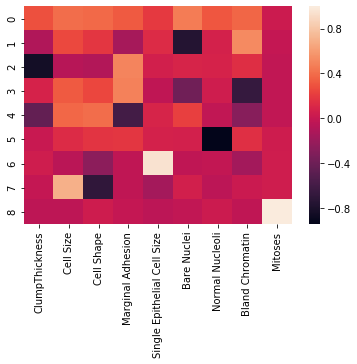

In [564]:
sns.heatmap(corr_df)
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [565]:
jokes_df = pd.read_excel('jokes.xlsx')

In [566]:
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Create a new dataframe named `ratings`, with only first 200 rows and all columns from 1(first column is 0) of dataset

In [567]:
ratings = jokes_df.head(200)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [568]:
ratings = ratings_df.replace(99.00, 0)

# Q14 Normalize the ratings using StandardScaler and save them in ratings_diff variable

In [569]:
scaler = StandardScaler()

ratings_diff = scaler.fit_transform(ratings)

In [570]:
ratings_diff

array([[ 0.17851402, -1.85701632,  1.67164929, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.37166689,  0.78949409, -0.1802773 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.96874834, -0.11788091, -0.12112987, ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 1.37166689,  0.46479617, -0.89412566, ..., -0.23610604,
         0.18266036, -0.02590486],
       [-1.24409131, -0.11788091, -0.12112987, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.04084254,  1.12308784, -1.60593445, ..., -0.02685824,
        -0.04144395, -0.16095388]])

# Q15  Find the mean for each column  in `ratings_diff` i.e, for each joke


In [571]:
all_mean = ratings_diff.mean(axis = 0)

all_mean

array([ 5.32907052e-17,  0.00000000e+00,  1.77635684e-17, -2.88657986e-17,
       -1.33226763e-17, -2.22044605e-18, -6.66133815e-18,  6.66133815e-18,
        1.66533454e-17, -5.32907052e-17,  8.88178420e-18, -3.55271368e-17,
       -4.44089210e-17, -8.88178420e-18,  3.55271368e-17, -8.88178420e-18,
       -1.19904087e-16,  1.99840144e-17,  2.55351296e-17,  8.88178420e-18,
        2.66453526e-17,  1.11022302e-16, -1.77635684e-17, -2.66453526e-17,
        4.44089210e-17, -1.33226763e-17, -5.32907052e-17, -1.77635684e-17,
        8.88178420e-18,  0.00000000e+00,  0.00000000e+00,  3.55271368e-17,
       -1.06581410e-16,  4.44089210e-18,  4.44089210e-18, -8.88178420e-18,
        1.77635684e-17,  1.77635684e-17, -2.22044605e-17, -1.77635684e-17,
        1.11022302e-17,  0.00000000e+00,  1.33226763e-17,  3.10862447e-17,
       -2.66453526e-17,  8.88178420e-18, -1.33226763e-17, -1.77635684e-17,
        7.77156117e-17, -1.77635684e-17,  7.10542736e-17, -8.88178420e-18,
       -8.88178420e-18, -

# Q16 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [572]:
all_mean_df = pd.DataFrame(data = ratings_diff)

In [573]:
all_mean_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.178514,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,1.371667,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.968748,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-1.014639,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,0.958652,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,1.371667,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-1.060529,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.371667,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,1.371667,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.086733,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


In [574]:
all_mean_df.mean(axis = 0)

0      3.365364e-17
1     -1.110223e-17
2     -9.658940e-17
3     -4.107825e-17
4      3.719247e-17
5     -8.881784e-18
6     -2.636780e-18
7     -1.665335e-18
8      2.331468e-17
9     -4.329870e-17
10    -2.553513e-17
11    -4.551914e-17
12    -8.604228e-17
13     6.661338e-17
14     5.467848e-17
15    -2.164935e-17
16    -1.065814e-16
17     1.637579e-17
18     2.331468e-17
19    -9.159340e-18
20     2.997602e-17
21     1.065814e-16
22     1.720846e-17
23    -2.775558e-17
24     4.329870e-17
25    -3.885781e-17
26    -1.498801e-17
27    -3.996803e-17
28    -9.436896e-18
29    -5.273559e-17
           ...     
71     7.632783e-19
72    -9.325873e-17
73    -4.024558e-17
74     7.743806e-17
75     1.290634e-17
76     3.885781e-17
77     3.747003e-18
78    -2.886580e-17
79    -9.853229e-18
80    -6.938894e-17
81     3.941292e-17
82     1.243450e-16
83     0.000000e+00
84     2.498002e-17
85    -2.045586e-16
86    -1.290634e-17
87    -8.465451e-17
88     5.107026e-17
89     2.997602e-17


In [575]:
new_df = pd.DataFrame(data = all_mean_df)

In [576]:
new_df.iloc[:,0].argsort()[:-10:-1]

199     53
198     50
197     38
196     86
195    135
194    166
193     44
192    121
191    158
Name: 0, dtype: int64